# Выбор локации для скважины

### Условия задачи:
    Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    Бюджет на разработку скважин в регионе — 10 млрд рублей.
    При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
    Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

    id — уникальный идентификатор скважины;
    f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
    product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings

In [2]:
from numpy.random import RandomState
state = RandomState(12345)

In [4]:
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

Определение констант

In [5]:
BUDGET = 10000000000
BARREL = 450000

In [6]:
try:
    data_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_geo_0 = pd.read_csv('C:/Users/Mikhail/оформление/Выбор локации для скважины/geo_data_0.csv')
    data_geo_1 = pd.read_csv('C:/Users/Mikhail/оформление/Выбор локации для скважины/geo_data_1.csv')
    data_geo_2 = pd.read_csv('C:/Users/Mikhail/оформление/Выбор локации для скважины/geo_data_2.csv')

In [7]:
data_geo_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [8]:
data_geo_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [9]:
data_geo_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [10]:
def data_miss(data):
    for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [11]:
data_miss(data_geo_0)

id - 0%
f0 - 0%
f1 - 0%
f2 - 0%
product - 0%


In [12]:
data_miss(data_geo_1)

id - 0%
f0 - 0%
f1 - 0%
f2 - 0%
product - 0%


In [13]:
data_miss(data_geo_2)

id - 0%
f0 - 0%
f1 - 0%
f2 - 0%
product - 0%


Пропусков в данных нет

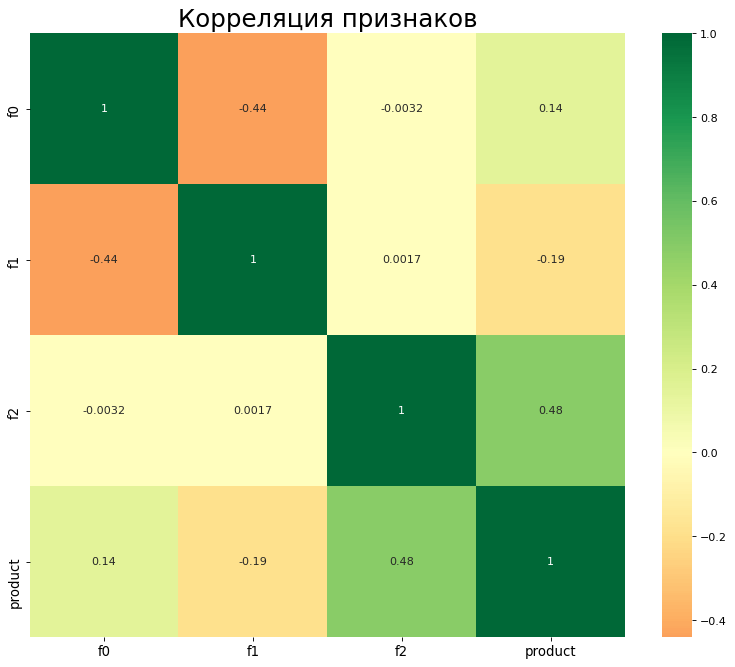

In [15]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_geo_0.corr(), xticklabels=data_geo_0.corr().columns, 
            yticklabels=data_geo_0.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

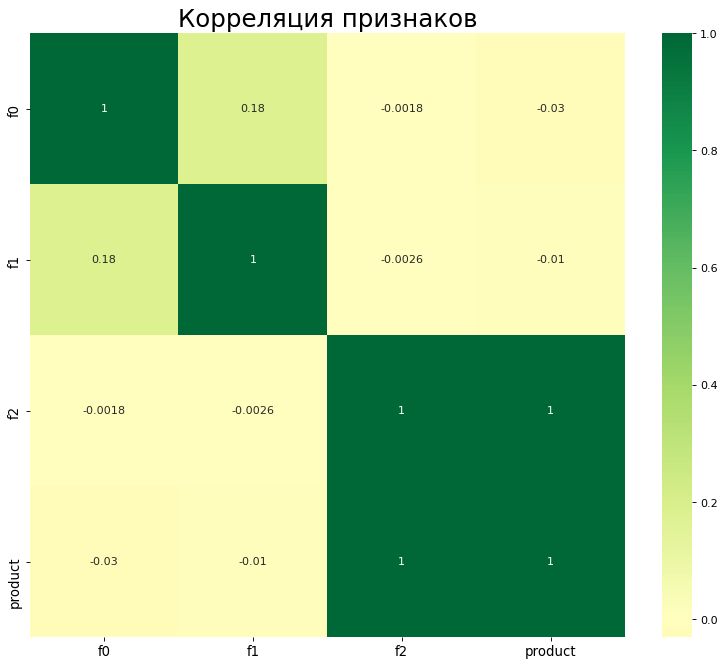

In [16]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_geo_1.corr(), xticklabels=data_geo_1.corr().columns, 
            yticklabels=data_geo_1.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

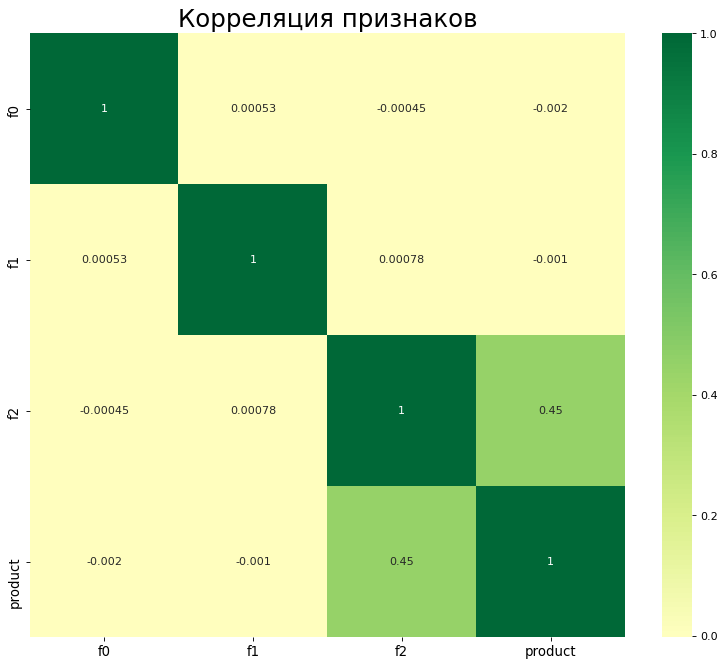

In [17]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_geo_2.corr(), xticklabels=data_geo_2.corr().columns, 
            yticklabels=data_geo_2.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Признаки слабо кореллируют между собой, оставляем все.

Т.К для обучения модели нам id не нужен(он никак не влияет на предсказания, например как имя клиента), его можно убрать

In [18]:
data_geo_0 = data_geo_0.drop('id', axis=1)
data_geo_1 = data_geo_1.drop('id', axis=1)
data_geo_2 = data_geo_2.drop('id', axis=1)

In [19]:
data_geo_0

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


## Обучение и проверка модели

Обучите и проверьте модель для каждого региона:

    2.1 Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    2.2 Обучите модель и сделайте предсказания на валидационной выборке.
    2.3 Сохраните предсказания и правильные ответы на валидационной выборке.
    2.4 Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    2.5 Проанализируйте результаты.

In [20]:
target_geo_0 = data_geo_0['product']
features_geo_0 = data_geo_0.drop(['product'] , axis=1)

features_train_geo_0, features_valid_geo_0, target_train_geo_0, target_valid_geo_0 = train_test_split(features_geo_0, target_geo_0, 
                                                                              test_size=0.25, random_state=12345)

In [21]:
target_valid_geo_0.shape, target_valid_geo_0.shape

((25000,), (25000,))

In [22]:
target_geo_1 = data_geo_1['product']
features_geo_1 = data_geo_1.drop(['product'] , axis=1)

features_train_geo_1, features_valid_geo_1, target_train_geo_1, target_valid_geo_1 = train_test_split(features_geo_1, target_geo_1, 
                                                                              test_size=0.25, random_state=12345)

In [23]:
target_valid_geo_1.shape, target_valid_geo_1.shape

((25000,), (25000,))

In [24]:
target_geo_2 = data_geo_2['product']
features_geo_2 = data_geo_2.drop(['product'] , axis=1)

features_train_geo_2, features_valid_geo_2, target_train_geo_2, target_valid_geo_2 = train_test_split(features_geo_2, target_geo_2, 
                                                                              test_size=0.25, random_state=12345)

In [25]:
target_valid_geo_1.shape, target_valid_geo_1.shape

((25000,), (25000,))

In [30]:
data_geo_0_model = pd.DataFrame()
data_geo_1_model = pd.DataFrame()
data_geo_2_model = pd.DataFrame()

def train_proof (train_f, train_t, valid_f, valid_t, number, data):
    model = LinearRegression().fit(train_f, train_t)
    prediction = model.predict(valid_f)
    true = valid_t
    RMSE = mean_squared_error(true, prediction)
    data['true'] = list(true)
    data['predict'] = list(prediction)
    data['true'].hist(grid=True, label='реальные', alpha=.5)
    data['predict'].hist(grid=True, label='предсказания')
    plt.xlabel('Тыс. бареллей')
    plt.ylabel('Колличество')
    plt.title('Распределение запасов в регионе')
    plt.legend()
    plt.show()
    print("Средний запас предсказанного сырья в регионе {:} - {: .2f} тыс. бареллей".format(number, prediction.mean()))
    print(('RMSE модели {: .2f} тыс. бареллей'.format(np.sqrt(RMSE))))

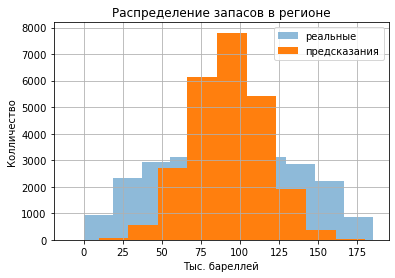

Средний запас предсказанного сырья в регионе 1 -  92.59 тыс. бареллей
RMSE модели  37.58 тыс. бареллей


In [31]:
train_proof(features_train_geo_0, target_train_geo_0, features_valid_geo_0, target_valid_geo_0, 1, data_geo_0_model)

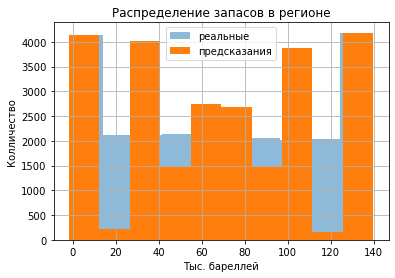

Средний запас предсказанного сырья в регионе 2 -  68.73 тыс. бареллей
RMSE модели  0.89 тыс. бареллей


In [32]:
train_proof(features_train_geo_1, target_train_geo_1, features_valid_geo_1, target_valid_geo_1, 2, data_geo_1_model)

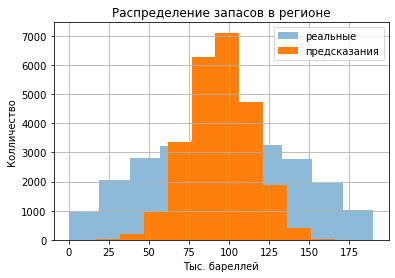

Средний запас предсказанного сырья в регионе 3 -  94.97 тыс. бареллей
RMSE модели  40.03 тыс. бареллей


In [33]:
train_proof(features_train_geo_2, target_train_geo_2, features_valid_geo_2, target_valid_geo_2, 3, data_geo_2_model)

В 1 и 3 регионе данные распределены нормально, но сильнее сконцетрированы вокруг среднего реальных данных запаса нефти.

Во втором регионе видно, что и реальные и предсказание сходятся в пиковых значениях максимума и минимума, и имеют в общей сложности 5 пиковых значений.

При этом, согласно показателю RMSE, 2 регион имеет наименьшую ошибку в предсказаниях относительно реальных значений запасов нефти в скважинах.

## Подготовка к расчёту прибыли

Подготовьтесь к расчёту прибыли:

    3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
    3.3. Напишите выводы по этапу подготовки расчёта прибыли.

In [34]:
data_geo_0_model = data_geo_0_model.sort_values(by=['predict'], ascending=False)
data_geo_0_model

,true,predict
9317,162.810993,180.180713
219,153.639837,176.252213
10015,162.153488,175.850623
11584,96.893581,175.658429
23388,178.879516,173.299686
...,...,...
23129,49.374929,10.209351
9078,25.956984,8.798531
21875,46.546824,6.569477
14503,11.018692,4.980987


In [35]:
data_geo_1_model = data_geo_1_model.sort_values(by=['predict'], ascending=False)
data_geo_1_model

,true,predict
20430,137.945408,139.818970
7777,137.945408,139.773423
8755,137.945408,139.703330
1178,137.945408,139.560938
4285,137.945408,139.516754
...,...,...
5085,0.000000,-1.634717
12426,0.000000,-1.693844
9852,0.000000,-1.871442
5617,0.000000,-1.883737


In [36]:
data_geo_2_model = data_geo_2_model.sort_values(by=['predict'], ascending=False)
data_geo_2_model

,true,predict
22636,175.103291,165.856833
24690,131.627481,165.679685
7811,141.160070,163.439962
1581,159.676082,162.062589
6751,142.135203,161.797476
...,...,...
21032,33.411204,23.323600
18206,60.244891,20.393911
11296,62.903882,20.189540
5298,57.022698,17.297411


Достаточный объём сырья для безубыточной разработки новой скважины

In [37]:
avarage_wells = BUDGET/200/BARREL
avarage_wells

111.11111111111111

In [38]:
data_geo_0_model['true'].mean(), data_geo_1_model['true'].mean(), data_geo_2_model['true'].mean()

(92.07859674082948, 68.7231360243899, 94.88423280885446)

Если расчитать необходимую среднюю величину запаса нефти в скважине для безубыточности, то она составит - 111.1 тыс. баррелей.

Средние величины всех регионов меньше этого значения.

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

    4.1. Выберите скважины с максимальными значениями предсказаний.
    4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    4.3. Рассчитайте прибыль для полученного объёма сырья.

In [39]:
def profit_wells(row, count):
    predict = row['predict']
    true = row['true']
    selected = true[predict.index][:count]
    profit = selected.sum() * BARREL - BUDGET
    return print(f'Прибыль составит: {profit/1000000000: .2f} млрд. рублей')

**1 регион**

In [40]:
profit_wells(data_geo_0_model, 200)

Прибыль составит:  3.32 млрд. рублей


**2 регион**

In [41]:
profit_wells(data_geo_1_model, 200)

Прибыль составит:  2.42 млрд. рублей


**3 регион**

In [42]:
profit_wells(data_geo_2_model, 200)

Прибыль составит:  2.71 млрд. рублей


Исходя из того, что в 1 и 3 регионе выше средний запас нефти видно, что предполагаемая прибыль в этих регионах выше, чем во втором.

## Расчёт рисков и прибыли для каждого региона

Посчитайте риски и прибыль для каждого региона:

    5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [44]:
def revenue(target, pedict, count):
    top_predict = pedict.sort_values(ascending=False)
    selected = target[top_predict.index][:count]
    profit = selected.sum() * BARREL - BUDGET
    return profit

In [45]:
def boostrap_wells(data, count_best, n_sample):
    predict = data['predict']
    true = data['true']
    
    values = []
    for i in range(1000):
        target_subsample = true.sample(n=n_sample, replace=False, random_state=state)
        probs_subsample = predict[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, 200))
    
    
    
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    
    risk = stats.percentileofscore(values, 0)
    
    print("Средняя выручка: {: .2f} млн. рублей".format(mean/1000000))
    print('95%-й доверительный интервал: {: .2f}  — {: .2f} млн.рублей'.format(lower/1000000, upper/1000000))
    print('Вероятность убытков {: .2f}%'.format(risk))

**1 регион**

In [46]:
boostrap_wells(data_geo_0_model, 200, 500)

Средняя выручка:  386.45 млн. рублей
95%-й доверительный интервал: -137.19  —  908.96 млн.рублей
Вероятность убытков  5.70%


**2 регион**

In [47]:
boostrap_wells(data_geo_1_model, 200, 500)

Средняя выручка:  466.12 млн. рублей
95%-й доверительный интервал:  63.19  —  856.63 млн.рублей
Вероятность убытков  0.90%


**3 регион**

In [48]:
boostrap_wells(data_geo_2_model, 200, 500)

Средняя выручка:  383.47 млн. рублей
95%-й доверительный интервал: -116.14  —  890.36 млн.рублей
Вероятность убытков  8.30%


Из трех регионов только второй подходит под условия задачи и имеет менее 2.5% риска убыточности при разработке месторождения и именно этот регион необходимо выбирать, но стоит учитывать, что во втором регионе не нормальное распределение запаса нефти в скважинах и там ярко выраженные пики на различных показателях.

- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован